Civic Analytics Problem Set 1

Question: How do a certain subset of crimes associated with graffiti line up with 311 graffiti complaints?

According to NYC's pdf on combating graffiti (http://www.nyc.gov/html/nypd/downloads/pdf/anti_graffiti/Combating_Graffiti.pdf) "Graffiti has also been related to drug and gang violence as well as the occult."

The data sets I used were and NYPD Complaint Data Current YTD and 311 Service Requests from 2010 to Present. I did an intial filter of both in Socrata to cut them down to the dates and columns I wanted to look at. This analysis is only for the year 2016.

to create df from "311 Service Requests from 2010 to Present" in Socrata filtered: to 'Created Date' between 12/31/2015 11:59:59 PM and 12/31/2016 11:59:59 PM cut out unnecessary columns removed Incident Zip= N/A

to create dc from "NYPD Complaint Data Current YTD" in Socrata filtered: to CMPLNT_FR_DT between 01/01/2016 and 12/31/2016 cut out unnecessary columns

I decided to group together the following offences into my "crime" variable: CRIMINAL MISCHIEF & RELATED OF' 'DANGEROUS DRUGS' 'OFF. AGNST PUB ORD SENSBLTY &'

'OFF. AGNST PUB ORD SENSBLTY &' in particular sounds like it could incompass demon summoning

with more time and computing power I would run through all offences to see if any correlate heavily with graffiti. These were quite arbitrily chosen, based off off the anti graffiti pamflet.

I wanted to group by zipcode, spent hours trying. This code is in the CivicAllFail ipynb. The API locked out my IP address for too many requests. Instead, on a suggestion of a classmate, used carto to filter count of graffiti by precinct and downloaded that data to excel.

link to map https://mariums.carto.com/builder/bdab9f0c-93f6-4d5c-abc0-b75fdd949187/embed

from the scatter plot it seems there is no correlation between my crime variable and graffiti. R2 is very low. crime has a lower std than graffiti

Precinct may be too large an area. Ideally we should map if more crimes happen near graffiti complaints by street.

Looks like the anti graffiti crowd will have to find other correlations with graffiti. These specific kinds of crimes did not seem to likely occur more in precincts with higher graffiti complaints. The problem with that is that not everyone calls in about graffiti equally and it could be places that have more 311 complaints about it do so because there are fewer other problems to worry about.

If a correlation is found, could help the NYPD patrol for crimes before they happen, simply based on graffiti call-ins.

Some resources I used: #https://github.com/MariumS/PUI2017_mas1300/blob/master/HW3_mas1300/HW3_2_mas1300.ipynb #other previous assignments #https://chrisalbon.com/ #https://stackoverflow.com/questions/34227038/python-pandas-merge-keyerror #a lot of stack overflow #https://stackoverflow.com/questions/35893176/how-to-assign-a-value-count-output-to-a-dataframe #Julian (classmate)

In [66]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [67]:

df= pd.read_csv('/Users/mariumsultan/Downloads/311_Service_Requests2016.csv')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Community Board,Borough,Latitude,Longitude,Location
0,32310161,01/01/2016 12:00:00 AM,12/08/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,10473,808 HARDING PARK,HARDING PARK,BRONX,Unspecified BRONX,BRONX,40.806742,-73.857150,"(40.80674160706358, -73.85715046762321)"
1,32310287,01/01/2016 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,Other (Explain Below),10468,2337 GRAND CONCOURSE,GRAND CONCOURSE,BRONX,05 BRONX,BRONX,40.858406,-73.899386,"(40.85840604170503, -73.89938613893433)"
2,32310788,01/01/2016 12:00:00 AM,11/23/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,10029,2172 2ND AVENUE,2ND AVENUE,NEW YORK,Unspecified MANHATTAN,MANHATTAN,40.794120,-73.939579,"(40.79411991259857, -73.93957875121706)"
3,32310789,01/01/2016 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11432,159-44 NORMAL ROAD,NORMAL ROAD,Jamaica,08 QUEENS,QUEENS,40.709824,-73.804555,"(40.709824136558204, -73.80455543495027)"
4,32310790,01/01/2016 12:00:00 AM,01/20/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11210,2300 KINGS HIGHWAY,KINGS HIGHWAY,BROOKLYN,Unspecified BROOKLYN,BROOKLYN,40.611521,-73.950394,"(40.61152137455337, -73.95039416824221)"


In [68]:

dc= pd.read_csv('/Users/mariumsultan/Downloads/NYPD_Complaint_Data2016.csv')
dc.head()


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon
0,907114138,01/01/2016,00:00:00,NaN,NaN,06/27/2017,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,67,INSIDE,RESIDENCE - APT. HOUSE,40.635142,-73.947896,"(40.635141912, -73.947895611)"
1,820366050,01/01/2016,00:01:00,NaN,NaN,06/21/2017,340,FRAUDS,718.0,"FRAUD,UNCLASSIFIED-MISDEMEANOR",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,67,INSIDE,RESIDENCE - APT. HOUSE,40.654954,-73.919816,"(40.654954094, -73.919815644)"
2,418016737,01/01/2016,01:10:00,NaN,NaN,06/19/2017,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13,INSIDE,RESIDENCE - APT. HOUSE,40.739878,-73.996869,"(40.73987766, -73.996869174)"
3,675554078,01/01/2016,00:00:00,12/31/2016,00:00:00,06/14/2017,109,GRAND LARCENY,422.0,"LARCENY,GRAND BY OPEN CREDIT CARD (NEW ACCT)",COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,115,INSIDE,RESIDENCE - APT. HOUSE,40.768613,-73.872032,"(40.768612754, -73.872031771)"
4,242421291,01/01/2016,00:01:00,05/30/2017,20:00:00,05/31/2017,233,SEX CRIMES,175.0,"SEXUAL ABUSE 3,2",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,79,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN


In [69]:
print pd.value_counts(dc['LAW_CAT_CD'])
print pd.value_counts(dc['OFNS_DESC'])


FELONY         3328
MISDEMEANOR    3217
VIOLATION       735
Name: LAW_CAT_CD, dtype: int64
GRAND LARCENY                           1736
PETIT LARCENY                           1284
HARRASSMENT 2                            728
CRIMINAL MISCHIEF & RELATED OF           670
OFF. AGNST PUB ORD SENSBLTY &            599
THEFT-FRAUD                              409
SEX CRIMES                               290
ASSAULT 3 & RELATED OFFENSES             205
MISCELLANEOUS PENAL LAW                  180
FRAUDS                                   168
FORGERY                                  146
BURGLARY                                 122
FELONY ASSAULT                            99
UNAUTHORIZED USE OF A VEHICLE             97
RAPE                                      95
GRAND LARCENY OF MOTOR VEHICLE            81
OFFENSES AGAINST PUBLIC ADMINI            61
THEFT OF SERVICES                         59
DANGEROUS DRUGS                           51
ARSON                                     20
NYS LAWS-

In [70]:

print (df['Complaint Type'] == 'Graffiti').sum()



12590
3217


In [71]:
#https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts


In [73]:
df2=df2.reset_index()
df2["Lat_Lon1"]= df2["Latitude"].astype(str) +" , "+ df2["Longitude"].astype(str)
df2 = df2.rename(columns={'Borough': 'BORO_NM'})
df2.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Community Board,BORO_NM,Latitude,Longitude,Location,Lat_Lon1
420,32316590,01/01/2016 01:19:49 AM,01/06/2016 06:48:39 AM,HPD,Department of Housing Preservation and Develop...,SAFETY,CARBON MONOXIDE DETECTOR,RESIDENTIAL BUILDING,11217,139 5 AVENUE,5 AVENUE,BROOKLYN,06 BROOKLYN,BROOKLYN,40.678357,-73.979133,"(40.67835744967798, -73.97913262979083)","40.6783574497 , -73.9791326298"
688,32317886,01/01/2016 02:20:36 AM,02/26/2016 09:33:05 AM,HPD,Department of Housing Preservation and Develop...,SAFETY,FIRE ESCAPE,RESIDENTIAL BUILDING,11203,3312 CHURCH AVENUE,CHURCH AVENUE,BROOKLYN,17 BROOKLYN,BROOKLYN,40.650954,-73.946448,"(40.65095398756497, -73.94644751706694)","40.6509539876 , -73.9464475171"
1760,32314247,01/01/2016 10:19:05 AM,03/21/2016 09:23:25 AM,HPD,Department of Housing Preservation and Develop...,SAFETY,WINDOW GUARD BROKEN/MISSING,RESIDENTIAL BUILDING,11354,38-25 149 PLACE,149 PLACE,Flushing,07 QUEENS,QUEENS,40.764222,-73.815644,"(40.76422158882514, -73.81564437413068)","40.7642215888 , -73.8156443741"
1763,32315090,01/01/2016 10:19:05 AM,03/21/2016 09:23:25 AM,HPD,Department of Housing Preservation and Develop...,SAFETY,SMOKE DETECTOR,RESIDENTIAL BUILDING,11354,38-25 149 PLACE,149 PLACE,Flushing,07 QUEENS,QUEENS,40.764222,-73.815644,"(40.76422158882514, -73.81564437413068)","40.7642215888 , -73.8156443741"
2869,32315078,01/01/2016 04:21:22 PM,02/13/2016 01:27:18 PM,HPD,Department of Housing Preservation and Develop...,SAFETY,CARBON MONOXIDE DETECTOR,RESIDENTIAL BUILDING,11208,595 AUTUMN AVENUE,AUTUMN AVENUE,BROOKLYN,05 BROOKLYN,BROOKLYN,40.674174,-73.867777,"(40.674174436899385, -73.86777732932977)","40.6741744369 , -73.8677773293"


In [74]:
value_list = ['CRIMINAL MISCHIEF & RELATED OF', 'DANGEROUS DRUGS', 'OFF. AGNST PUB ORD SENSBLTY &']
#Grab DataFrame rows where column has certain values
dc2= dc[dc.OFNS_DESC.isin(value_list)]

#dc2= dc.drop(dc[dc['OFNS_DESC'] != 'CRIMINAL MISCHIEF & RELATED OF'].index)           

In [75]:
#cleaning data
dc3= dc2[['CMPLNT_FR_DT','OFNS_DESC','LAW_CAT_CD','ADDR_PCT_CD','BORO_NM', 'Latitude','Longitude','Lat_Lon']]
dc3
dc3.dropna()
dc3=dc3.reset_index()
dc3.head()
len(dc3)

1320

In [78]:
dc3.head()

,level_0,index,CMPLNT_FR_DT,OFNS_DESC,LAW_CAT_CD,ADDR_PCT_CD,BORO_NM,Latitude,Longitude,Lat_Lon,Lat_Lon1
0,0,2,01/01/2016,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,13,MANHATTAN,40.739878,-73.996869,"(40.73987766, -73.996869174)","40.73987766 , -73.996869174"
1,1,18,01/01/2016,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,73,BROOKLYN,40.666232,-73.922538,"(40.666231521, -73.922538001)","40.666231521 , -73.922538001"
2,2,29,01/01/2016,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,28,MANHATTAN,40.808558,-73.952358,"(40.808557679, -73.952358366)","40.808557679 , -73.952358366"
3,3,34,01/01/2016,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,62,BROOKLYN,40.623175,-74.000866,"(40.623175451, -74.000865993)","40.623175451 , -74.000865993"
4,4,35,01/01/2016,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,62,BROOKLYN,40.623175,-74.000866,"(40.623175451, -74.000865993)","40.623175451 , -74.000865993"


In [125]:
dfm= pd.read_csv('graffitiP.csv')
dfm.head()
dfm = dfm.rename(columns={'count': 'graffiti count'})
dfm = dfm.rename(columns={'precinct ': 'precinct'})

dfm.head()
#graffiti incidents by precinct 

,precinct,graffiti count
0,1,84
1,5,275
2,6,94
3,7,384
4,9,333


In [127]:

#print dc3.groupby(['ADDR_PCT_CD']).size()

ADDR_PCT_CD
1      22
5      13
6      13
7      32
9      16
10      9
13     17
14     31
17      4
18     16
19     17
20     16
23     28
24      9
25     19
26     10
28     36
30     10
32     19
33     11
34     14
40     27
41     18
42     15
43     22
44     38
45     32
46     42
47     13
48      8
       ..
76      5
77     17
78      6
79     12
81      6
83      9
84     12
88      9
90      9
94     23
100     5
101     7
102    18
103    31
104    20
105    23
106    11
107    14
108    12
109    18
110     9
111     5
112     9
113    19
114    20
115    24
120    25
121    32
122    13
123     7
dtype: int64


In [128]:
dc4 = dc3['ADDR_PCT_CD'].value_counts().reset_index()
dc4.columns = ['precinct', 'precinct crime count']
dc4['precinct']= dc4['precinct'].astype(str)
#dc4.rename(columns={''precinct':'precinct'}, inplace = True)

In [151]:
import statistics

import collections
import decimal
import math
import numbers

dc4.head()
statistics.mean(dc4['precinct crime count'])
#type(dc4)

17.368421052631579

In [130]:
dfm.head()
list(dfm)

['precinct', 'graffiti count']

In [131]:
dfm['precinct']= dfm['precinct'].astype(str)



In [134]:
df5= pd.merge(dc4, dfm, on='precinct', how='inner')
df5.head()

,precinct,precinct crime count,graffiti count
0,46,42,185
1,62,40,299
2,44,38,154
3,61,37,258
4,28,36,172


In [158]:
y = df5['precinct crime count']
X = df5['graffiti count']

Gmean= np.mean(X)
Cmean= np.mean(y)
Gstd=np.std(X)
Cstd=np.std(y)

#print(Gstd, Cstd, Gmean, Cmean)

print 'graffiti count std: {}, crime count std: {}, graffiti count mean: {}, crime count mean:{}'.format(Gstd, Cstd, Gmean, Cmean)

graffiti count std: 124.245838535, crime count std: 9.18643465755, graffiti count mean: 161.605263158, crime count mean:17.3684210526


In [159]:
import statsmodels.formula.api as smf



df=pd.DataFrame({'X':X, 'Y':y}, columns=['X','Y'])
ols3= smf.ols('Y~X',df).fit()
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.978
Date:                Tue, 10 Oct 2017   Prob (F-statistic):              0.164
Time:                        02:21:28   Log-Likelihood:                -275.38
No. Observations:                  76   AIC:                             554.8
Df Residuals:                      74   BIC:                             559.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.4404      1.729      8.930      0.000        11.995    18.886
X              0.0119      0.008      1.406      0.164        -0.005     0.029
==============================================================================
Omnibus:                        8.551   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.087
Skew:                           0.845   Prob(JB):                       0.0106
Kurtosis:                       2.888   Cond. No.                         334.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

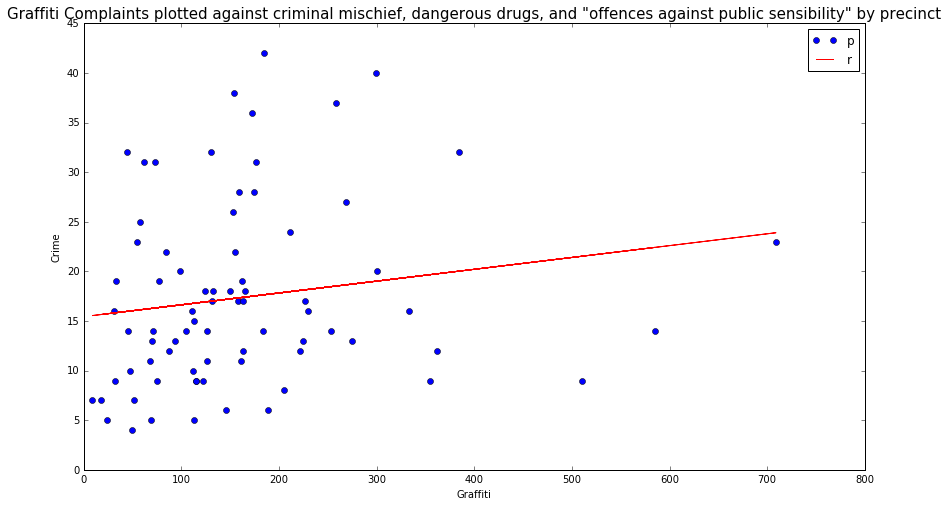

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

#'CRIMINAL MISCHIEF & RELATED OF', 'DANGEROUS DRUGS', 'OFF. AGNST PUB ORD SENSBLTY &'
plt.figure(figsize=(14,8))
plt.plot(X, y, 'o')
plt.title('Graffiti Complaints plotted against criminal mischief, dangerous drugs, and "offences against public sensibility" by precinct', fontsize = 15)
plt.xlabel('Graffiti')
plt.ylabel('Crime')
plt.plot(X, ols3.predict(), '-r')
plt.legend("precinct")

In [ ]:
#resources:
#https://github.com/MariumS/PUI2017_mas1300/blob/master/HW3_mas1300/HW3_2_mas1300.ipynb
#https://chrisalbon.com/
#https://stackoverflow.com/questions/34227038/python-pandas-merge-keyerror
#https://stackoverflow.com/questions/35893176/how-to-assign-a-value-count-output-to-a-dataframe
#Julian 
